[View in Colaboratory](https://colab.research.google.com/github/scumabo/Deep-Learning-with-tf.keras/blob/master/3_MNIST_classification_fully_connected_neural_networks_(tf_keras).ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
data = pd.read_csv("MNIST_train.csv").values

X_data = data[:, 1:]
Y_data = data[:, [0]]

# Simple normalization
X_data = X_data / 255

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state = 0)

print("Number of training examples = " + str(X_train.shape[0]) )
print("Number of testing examples = " + str(X_test.shape[0]) )
print("Number of features = " +  str(X_train.shape[1]) )

Number of training examples = 31500
Number of testing examples = 10500
Number of features = 784


Text(0.5,1,'label is [5]')

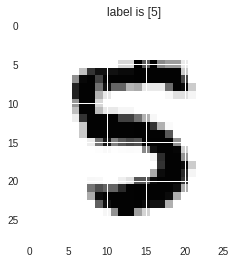

In [7]:
index = 20
sampleImg = np.reshape(X_train[index, :], [28, 28])

ax = plt.imshow(sampleImg)
plt.title("label is " + str(Y_train[index, :]))

Epoch 1/50
31500/31500 [==============================] - 6s 199us/step - loss: 0.4214 - acc: 0.8727
Epoch 2/50
31500/31500 [==============================] - 6s 191us/step - loss: 0.1727 - acc: 0.9499
Epoch 3/50
31500/31500 [==============================] - 6s 190us/step - loss: 0.1287 - acc: 0.9617
Epoch 4/50
31500/31500 [==============================] - 6s 190us/step - loss: 0.1028 - acc: 0.9687
Epoch 5/50
31500/31500 [==============================] - 6s 192us/step - loss: 0.0855 - acc: 0.9736
Epoch 6/50
31500/31500 [==============================] - 6s 192us/step - loss: 0.0736 - acc: 0.9768
Epoch 7/50
31500/31500 [==============================] - 6s 191us/step - loss: 0.0592 - acc: 0.9816
Epoch 8/50
31500/31500 [==============================] - 6s 191us/step - loss: 0.0544 - acc: 0.9817
Epoch 9/50
31500/31500 [==============================] - 6s 190us/step - loss: 0.0460 - acc: 0.9853
Epoch 10/50
31500/31500 [==============================] - 6s 191us/step - loss: 0.0406 - a

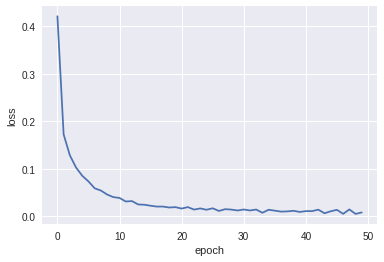

In [8]:
tf.set_random_seed(1)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

History = model.fit(X_train, Y_train, epochs = 50)

plt.plot(History.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [10]:
model.evaluate(X_test, Y_test)

10500/10500 [==============================] - 1s 53us/step


[0.25461205054514296, 0.9656190476190476]

The test accuracy is 96 $\%$ and the training accuracy is 99.71 $\%$. Let's add dropout regularizers.